### bulk 火山图

In [6]:
library(ggplot2)
library(dplyr)

# 读取 CSV
df <- read.csv("MvsK.csv")

# 检查列名
head(df)


,Gene.id,Gene_name,Gene.description,FC.M.K.,Log2FC,Pvalue,Padjust,Significant,Regulate,M1,M2,M3,K1,K3,K4,M,K
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSRNOG00000000001,Arsj,"arylsulfatase family, member J [Source:RGD Symbol;Acc:1307640]",0.5347868,-0.9029641,0.1425649,0.4648037,no,down,2.68,0.93,0.41,1.79,2.09,2.61,1.34000000,2.16333333
2,ENSRNOG00000000007,Gad1,glutamate decarboxylase 1 [Source:RGD Symbol;Acc:2652],1.4888971,0.5742441,0.1170402,0.4063830,no,up,0.65,0.44,0.57,0.40,0.54,0.30,0.55333333,0.41333333
3,ENSRNOG00000000008,Alx4,ALX homeobox 4 [Source:RGD Symbol;Acc:1310201],0.7226308,-0.4686693,0.3659909,0.8317529,no,down,0.00,0.00,0.00,0.00,0.00,0.05,0.00000000,0.01666667
4,ENSRNOG00000000009,Tmco5b,transmembrane and coiled-coil domains 5B [Source:RGD Symbol;Acc:1561237],0.7226308,-0.4686693,0.3659909,0.8317529,no,down,0.00,0.00,0.00,0.00,0.00,0.07,0.00000000,0.02333333
5,ENSRNOG00000000010,Cbln1,cerebellin 1 precursor [Source:RGD Symbol;Acc:1562813],0.7194326,-0.4750685,0.4854454,0.9550781,no,down,0.06,0.03,0.15,0.16,0.06,0.17,0.08000000,0.13000000
6,ENSRNOG00000000012,Tcf15,transcription factor 15 [Source:RGD Symbol;Acc:1308464],0.7282131,-0.4575675,0.6130259,1.0000000,no,down,0.20,0.00,0.00,0.00,0.18,0.10,0.06666667,0.09333333


In [7]:
df <- df %>%
  mutate(
    Significance = case_when(
      Padjust < 0.05 & Log2FC > 2 ~ "Up",
      Padjust < 0.05 & Log2FC < -2 ~ "Down",
      TRUE ~ "NS"
    )
  )


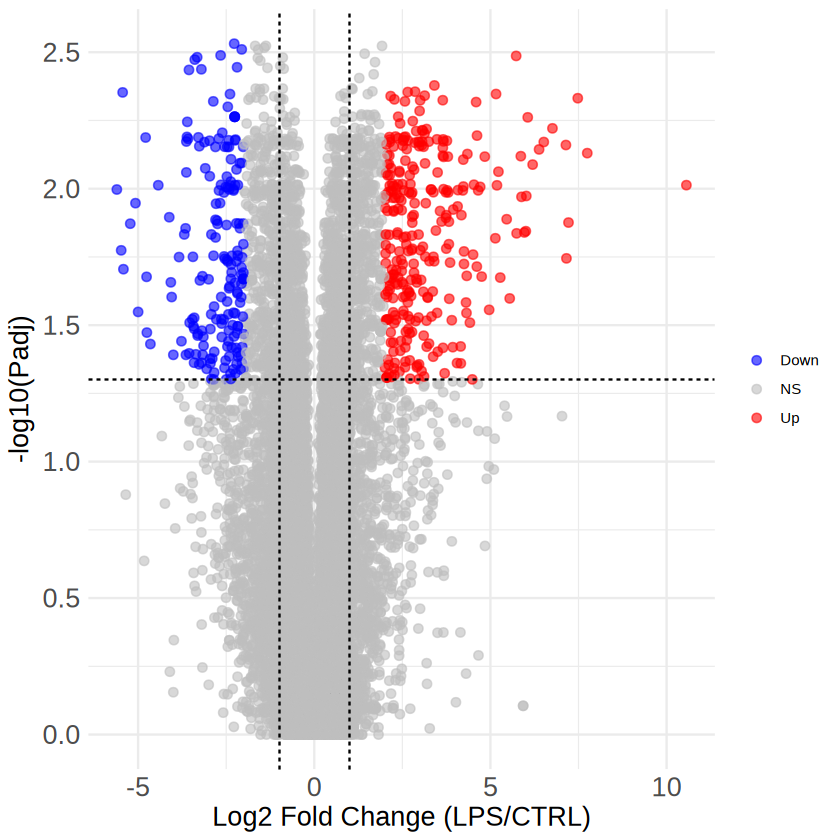

In [8]:
ggplot(df, aes(x = Log2FC, y = -log10(Padjust), color = Significance)) +
  geom_point(alpha = 0.6, size = 2) +
  scale_color_manual(values = c("Up"="red", "Down"="blue", "NS"="grey")) +
  theme_minimal() +
  xlab("Log2 Fold Change (LPS/CTRL)") +
  ylab("-log10(Padj)") +
  geom_vline(xintercept = c(-1,1), linetype="dashed", color="black") +
  geom_hline(yintercept = -log10(0.05), linetype="dashed", color="black") +
  theme(
    legend.title = element_blank(),
    axis.text = element_text(size=16),
    axis.title = element_text(size=16)
  )


In [9]:
library(ggrepel)
options(repr.plot.width=10, repr.plot.height=8)
pdf("Volcano_MvsK.pdf", width=10, height=8)
top_genes <- df %>% filter(Padjust < 0.01 & abs(Log2FC) > 2)

ggplot(df, aes(x = Log2FC, y = -log10(Padjust), color = Significance)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_text_repel(data = top_genes, aes(label = Gene_name), size=4) +
  scale_color_manual(values = c("Up"="red", "Down"="blue", "NS"="grey")) +
  theme_minimal() +
  xlab("Log2 Fold Change (M/K)") +
  ylab("-log10(Padj)") +
  geom_vline(xintercept = c(-2,2), linetype="dashed", color="black") +
  geom_hline(yintercept = -log10(0.05), linetype="dashed", color="black") +
  theme(
    axis.text = element_text(size = 14),      # XY轴刻度字体大小
    axis.title = element_text(size = 16),     # XY轴标题字体大小
    legend.text = element_text(size = 12),    # 图例文字大小
    legend.title = element_text(size = 14)    # 图例标题大小
  )
dev.off()

Warning message:
“ggrepel: 113 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


agg_record_2089862213 
                    2

## 三个数据集的venn图!!!!

In [16]:


library(dplyr)
library(readxl)
library(VennDiagram)

# 1. 读取 markers 文件
markers <- read_excel("06.markers_just_macro.xlsx")

# 选择 cluster = c10 且 avg_log2FC > 1 的基因
cluster2_genes <- markers %>%
  filter(cluster == "Macrophages_c10", avg_log2FC > 1) %>%
  pull(gene)

# 2. 读取差异基因 CSV 文件
df <- read.csv("MvsK.csv")

low_fc_genes <- df %>%
  filter(Log2FC > 2, Padjust < 0.05) %>%
  pull(Gene_name)

# 3. 读取 SCENIC 文件的 TargetGene 列
scenic <- read.csv("c10_scenic_gene_target.csv")

scenic_genes <- scenic %>%
  pull(TargetGene)

# 4. 绘制三集合 Venn 图
venn.plot <- venn.diagram(
  x = list(
    Cluster2 = cluster2_genes,
    LowFC    = low_fc_genes,
    SCENIC   = scenic_genes
  ),
  filename = NULL,
  fill = c("cornflowerblue", "darkorchid1", "seagreen3"),
  cat.col = c("cornflowerblue", "darkorchid1", "seagreen3"),
  cat.cex = 1.1,
  cat.pos = c(-20, 20, 180)
)

pdf(file="c10_up_3sets.pdf", width=6, height=6)
grid.draw(venn.plot)
dev.off()


agg_record_1792163652 
                    2

In [17]:
# 计算三个集合的交集基因
common_genes <- Reduce(intersect, list(cluster2_genes, low_fc_genes, scenic_genes))

# 找出交集基因在 MvsK.csv 中的 Log2FC 和 Padjust
common_df <- df %>%
  filter(Gene_name %in% common_genes) %>%
  select(Gene_name, Log2FC, Padjust) %>%
  arrange(desc(Log2FC))   # 按 Log2FC 从大到小排序

# 打印结果
print(common_df)

# 保存到文件
write.csv(common_df, "c10_common_gene_Log2FC_3sets.csv", row.names = FALSE)


  Gene_name   Log2FC   Padjust
1      Msr1 2.362683 0.0144653


## 二个数据集的venn图!!!!（bulk & sigmarker）

In [5]:
# library(dplyr)
# library(readxl)
# library(VennDiagram)

# # 1. 读取 markers 文件
# markers <- read_excel("06.markers_just_macro.xlsx")

# # 选择 cluster = 2 且 |avg_log2FC| > 2 的基因
# cluster2_genes <- markers %>%
#   filter(cluster == "Macrophages_c10", avg_log2FC > 1) %>%
#   pull(gene)   # 提取 gene 列

# # 2. 读取差异基因 CSV 文件
# df <- read.csv("MvsK.csv")


# low_fc_genes <- df %>%
#   filter(Log2FC > 2, Padjust < 0.05) %>%
#   pull(Gene_name)   # 提取 Gene 列

# # 3. 绘制 Venn 图
# venn.plot <- venn.diagram(
#   x = list(
#     Cluster2 = cluster2_genes,
#     LowFC = low_fc_genes
#   ),
#   filename = NULL,
#   fill=c("cornflowerblue", "darkorchid1"),
# #   alpha = 0.5,
# #   cex = 2,
# cat.col = c("cornflowerblue", "darkorchid1"),
#   cat.cex = 1.1,
#   cat.pos = c(-1, 1),
# #   main = "Venn Diagram"
# )

# pdf(file="c10_up.pdf", width=5, height=5)
# grid.draw(venn.plot)
# dev.off()

Loading required package: grid

Loading required package: futile.logger



agg_record_826556923 
                   2

In [7]:
# # 找出交集基因在 MvsK.csv 中的 Log2FC 和 Padjust
# common_df <- df %>%
#   filter(Gene_name %in% common_genes) %>%
#   select(Gene_name, Log2FC, Padjust) %>%
#   arrange(desc(Log2FC))   # 按 Log2FC 升序排列（从小到大）

# # 打印结果
# print(common_df)

# # 保存到文件
# write.csv(common_df, "c10_common_gene_Log2FC_2.csv", row.names = FALSE)


   Gene_name   Log2FC     Padjust
1       Lcn2 6.004678 0.014309364
2       Slpi 4.249906 0.016974904
3     Cxcl13 3.944656 0.011923128
4        Mt1 3.820340 0.015967138
5      Cxcl1 3.748356 0.012501038
6   Serpine1 3.670782 0.007645370
7      Itgam 3.452405 0.014236610
8  Serpinb1a 3.380762 0.010302394
9       Lrg1 3.323363 0.010070081
10   Emilin2 3.059087 0.006715853
11    Clec4d 3.005572 0.004744430
12      Selp 2.848521 0.011303308
13    Adgre1 2.821564 0.018839063
14      Msr1 2.362683 0.014465298
15     C3ar1 2.254875 0.012121876


In [8]:
ssseds

ERROR: Error: object 'ssseds' not found


In [ ]:
common_genes

[1] "Cfb"      "Acod1"    "Nos2"     "Aoah"     "Pgk1"     "Pstpip2" 
 [7] "Slc7a8"   "Pik3ap1"  "Il1rn"    "Slc7a11"  "Pla2g4a"  "Slc2a1"  
[13] "Lgals3bp" "Gpnmb"    "Hk2"      "Cxcl9"    "Ptgs2"    "Fcgr2b"  
[19] "Ier3"     "Sod2"     "Ccl3"     "Clec4d"   "Bst1"     "Arg1"    
[25] "Ctsz"     "Hspa5"    "Tnfaip3"  "Tgfbi"    "Pde4b"    "Hmox1"   
[31] "Nlrp3"    "Fbxl5"    "Cxcl1"    "Clec4e"   "Prdx5"

### 交集基因在所有细胞亚型中得表达量气泡图

In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
# library(readr)
library(ggplot2)
#有云服务器的，可开启并运算，这里我用4个线程：
library(future)
library(qs)
# check the current active plan
plan()
# change the current plan to access parallelization
plan("multisession", workers =40)
plan()

#设置可用的内存
options(future.globals.maxSize = 4 * 1024^3)
plan("sequential")
future::plan()


Loading required package: SeuratObject

Loading required package: sp



‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan(sequential)
FutureBackend to be launched

multisession:
- args: function (..., workers = 40)
- tweaked: TRUE
- call: plan("multisession", workers = 40)
MultisessionFutureBackend:
Inherits: ClusterFutureBackend, MultiprocessFutureBackend, FutureBackend
UUID: d1cca2aead0a8b706a4d0fbba8b80ca6
Number of workers: 40
Number of free workers: 40
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘rscript_libs’: "/home/guoliming/micromamba/envs/R4.4.3/lib/R/library"
Argument ‘persistent’: FALSE
Argument ‘wait.timeout’: 86400
Argument ‘wait.interval’: 0.01
Argument ‘wait.alpha’: 1.01
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)
Workers of type RichSOCKcluster:
- Summary: Socket cluster with 40 nodes on host ‘localhost’ (R version 4.4.3 (2025-02-28), platform x86_64-conda-linux-gnu)
- [ OK ] Node 1/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41441 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #5 ('<-localhost:11605')]
- [ OK ] Node 2/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41476 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #6 ('<-localhost:11605')]
- [ OK ] Node 3/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41454 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #7 ('<-localhost:11605')]
- [ OK ] Node 4/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41452 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #8 ('<-localhost:11605')]
- [ OK ] Node 5/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41453 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #9 ('<-localhost:11605')]
- [ OK ] Node 6/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41472 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #10 ('<-localhost:11605')]
- [ OK ] Node 7/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41465 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #11 ('<-localhost:11605')]
- [ OK ] Node 8/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41475 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #12 ('<-localhost:11605')]
- [ OK ] Node 9/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41456 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #13 ('<-localhost:11605')]
- [ OK ] Node 10/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41474 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #14 ('<-localhost:11605')]
- [ OK ] Node 11/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41460 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #15 ('<-localhost:11605')]
- [ OK ] Node 12/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41448 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #16 ('<-localhost:11605')]
- [ OK ] Node 13/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41437 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #17 ('<-localhost:11605')]
- [ OK ] Node 14/40: valid connection, alive [RichSOCKnode of a

sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan("sequential")
SequentialFutureBackend:
Inherits: FutureBackend
UUID: 611f854234c5ea6f7347054145d04c12
Number of workers: 1
Number of free workers: 1
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)

In [2]:
# seurat.data=qread(file = "/home/guoliming/Brown/ALI_CRL/ALI/Outdata/Step3.Cluster_annotion.qs")
# other_cells  <- subset(seurat.data, subset = celltype %in% c("T cells","B cells","Other Myeloid cells","Smooth muscle cells","Platelets"))

# Endothelial <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Endothelial/Outdata/Sub_annotion.qs")
# Epithelial <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Epithelial/Outdata/Sub_annotion.qs")
# Fibroblast <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Fibroblast/Outdata/Sub_annotion.qs")

# NK_cells <- qread("/home/guoliming/Brown/ALI_CRL/ALI/NK cells/Outdata/Sub_annotion.qs")
# Neutrophils <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Neutrophils/Outdata/Sub_annotion.qs")
# Macrophages <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Macrophages/Outdata/Sub_annotion.qs")

# # 合并为一个新的 Seurat 对象
# seurat.data <- merge(other_cells, y = list(Endothelial, Epithelial,Fibroblast,NK_cells,Neutrophils,Macrophages), project = "ALI_Selected")

# seurat.data <- subset(seurat.data, subset = !grepl("\\(", celltype))

# qsave(seurat.data, file = "/home/guoliming/Brown/ALI_Gaoji/sc_bulk_analysis_Epithelial/7_RNAseq/all_cells.qs")

In [3]:
seurat.data = qread(file = "/home/guoliming/Brown/ALI_Gaoji/sc_bulk_analysis_Epithelial/7_RNAseq/all_cells.qs")

In [5]:
common_genes = c(
    # "Clec4d",
"Cxcl9",
"Clec4e",
"Hmox1",
"Nos2",
"Sod2",
"Acod1",

"Tfec",
"Csf2rb",
# "Hmox1",

# "Clec4d",
"Msr1")


In [6]:

# #绘制marker在各个cluster的气泡图
pdf(file="common_genes_Bubble_logfc1.pdf",width=20,height=12)
cluster10Marker=common_genes
DotPlot(object = seurat.data, features = cluster10Marker) + 
# RotatedAxis() +  # 旋转 X 轴文字，推荐 Seurat 自带函数
theme(
    axis.text.x = element_text(size = 16, angle = 45, hjust = 1),  # 横轴文字
    axis.text.y = element_text(size = 16),                          # 纵轴文字
    axis.title.x = element_blank(),  # 去掉X轴标题
    axis.title.y = element_blank(),  # 去掉Y轴标题
    legend.title = element_text(size = 16),
    legend.text  = element_text(size = 16),
    legend.key.size = unit(0.8, "cm")  # 图例符号大小
  )
dev.off()


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


agg_record_1202366173 
                    2